The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt    

nobel = pd.read_csv('data/nobel.csv')
nobel.head()

Matplotlib is building the font cache; this may take a moment.


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [2]:
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
print(top_gender)
print(top_country)

Male
United States of America


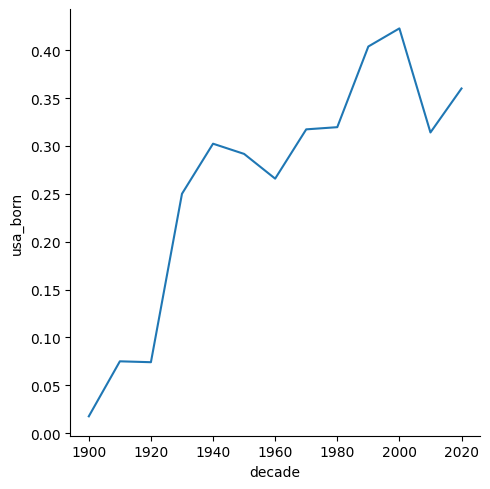

In [3]:
nobel['usa_born'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born'].mean()
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born'] == prop_usa_winners['usa_born'].max()]['decade'].values[0]

graph1 = sns.relplot(x='decade', y='usa_born', data=prop_usa_winners, kind="line")
plt.show()

In [4]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_category = prop_female[prop_female['female_winner'] == prop_female['female_winner'].max()][['decade','category']]
max_female_dict = {max_female_category['decade'].values[0]: max_female_category['category'].values[0]}

print(prop_female)
print(max_female_category)

    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
67    2020   Economics       0.111111
68    2020  Literature       0.500000
69    2020    Medicine       0.125000
70    2020       Peace       0.285714
71    2020     Physics       0.166667

[72 rows x 3 columns]
    decade    category
68    2020  Literature


In [5]:
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [6]:
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print(counts.head())
print(repeats)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64
Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Frederick Sanger', 'John Bardeen',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)',
       'Linus Carl Pauling', 'Marie Curie, née Sklodowska'],
      dtype='object', name='full_name')
